# Individual Challenge Dungeons and Dragons CR Predictor

## Introduction


Dungeons and Dragons (D&D) is a tabletop role-playing game that is all about collaborative storytelling where the players and the Dungeon Master(DM) proceed through the story together and encounter a wide variety of monsters and other things. In D&D, players often fight against monsters, which have a bunch of characteristics, including stats like strength, dexterity, constituation, intelligence, wisdom and charisma. Each monster is assigned a Challenge Rating (CR), which represents how difficult that creature is for players to defeat.

In this project, we will be looking at the collection of monsters that Dungeons and Dragons 5e has to offer and attempt to make predictions based on their features and characteristics in an attempt to calculate the CR of the monster.

Let's look at the dataset we will be using.


## Data Provisioning

We are using the **DnD 5e Monsters** dataset from Kaggle. The data from this dataset has been cross-checked against different API's ([www.dnd5eapi.co](https://www.dnd5eapi.co/) , https://open5e.com/) and the official books.



### Exploring the data
Let’s start by loading the dataset and taking a closer look at what we are working with. 
This first step allows us to understand the data's layout, the range of the values, and assess its suitability for building a model.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'dnd_monsters.csv'
df = pd.read_csv(file_path)

print("Number of rows and columns:", df.shape)
df.head()


Number of rows and columns: (762, 17)


,name,url,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
0,aarakocra,https://www.aidedd.org/dnd/monstres.php?vo=aar...,1/4,humanoid (aarakocra),Medium,12,13,fly,neutral good,NaN,Monster Manual (BR),10.0,14.0,10.0,11.0,12.0,11.0
1,abjurer,NaN,9,humanoid (any race),Medium,12,84,NaN,any alignment,NaN,Volo's Guide to Monsters,NaN,NaN,NaN,NaN,NaN,NaN
2,aboleth,https://www.aidedd.org/dnd/monstres.php?vo=abo...,10,aberration,Large,17,135,swim,lawful evil,Legendary,Monster Manual (SRD),21.0,9.0,15.0,18.0,15.0,18.0
3,abominable-yeti,NaN,9,monstrosity,Huge,15,137,NaN,chaotic evil,NaN,Monster Manual,NaN,NaN,NaN,NaN,NaN,NaN
4,acererak,NaN,23,undead,Medium,21,285,NaN,neutral evil,NaN,Adventures (Tomb of Annihilation),NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.describe()

,ac,hp,str,dex,con,int,wis,cha
count,762.000000,762.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,14.577428,88.129921,15.231920,12.745636,15.147132,8.324190,11.820449,10.097257
std,3.140581,94.822305,6.492964,3.183573,4.383012,5.694264,3.093167,5.696755
min,0.000000,0.000000,1.000000,1.000000,8.000000,1.000000,2.000000,1.000000
25%,12.000000,22.000000,11.000000,10.000000,12.000000,3.000000,10.000000,6.000000
50%,14.000000,58.000000,16.000000,13.000000,14.000000,8.000000,12.000000,9.000000
75%,17.000000,126.000000,19.000000,15.000000,17.000000,12.000000,13.000000,14.000000
max,25.000000,676.000000,30.000000,28.000000,30.000000,26.000000,27.000000,30.000000



___
We can see that our dataset comprises of **762** observations and **17** features. Each row represents a unique monster within the D&D universe and contains attributes that define the monster's capabilities, such as its **Challenge Rating (CR)**, **Hit Points (HP)**, **Armor Class (AC)**, **Size**, **Legendary Status**, and **Ability Scores** **(Strength, Dexterity, Constitution, Intelligence, Wisdom, and Charisma)**.

The dataset includes a variety of monsters across different CR values, ranging from weak creatures like goblins to high level threats like dragons. CR is the most imporant feature here, as it reflects the monster’s difficulty level and will be our target variable in the model. 

Since each observation represents a unique monster, there are no duplicate entries. This is beneficial because duplicates could bias the model by over-representing certain monster types. 

To proceed further, we should evaluate the data to guarantee its completeness and accuracy. For example, if there are missing or inaccurate values in key columns like HP or AC, it could impact the model’s performance. 

Our initial check already reveals that several monsters are missing values in their ability score fields like Strength or Dexterity. For any missing values, we’ll consider imputation or other methods. 
Furthermore, some CR values are represented as fractions (for example: "1/4" instead of 0.25), so we will need to encode these entries to ensure consistency.

Next, we’ll provide a structured data dictionary for all features and then decide on a final subset to include in the model. 


### Data Dictionary


#### 1. Data Element Name: **Name**
- **Data Type**: String
- **Description**: The name of the monster
- **Quality Standards**:Names should be unique and non-null to properly identify each monster.
---

#### 2. Data Element Name: **URL**
- **Data Type**: String
- **Description**: A URL link that provides additional reference information for the monster.

---

#### 3. Data Element Name: **Type**
- **Data Type**: Categorical
-   **Range**: 14
- **Description**: The monster's classification in terms of creature type. The 14 types consist of Aberration, Beast, Celestial, Construct, Dragon, Elemental, Fey, Fiend, Giant, Humanoid, Monstrosity, Ooze, Plant, nad Undead.

---

#### 4. Data Element Name: **Speed**
- **Data Type**: Categorical
- **Range**: 4
- **Description**: The special movement options the monster possesses. The 5 options are Flying, Swimming, Flying Swimming, or Nothing
---

#### 5. Data Element Name: **Align**
- **Data Type**: Categorical
- **Range**: 9.
- **Description**: The moral and ethical alignment of the monster, based on the D&D alignment system. The 9 alignments consist of Lawful Good, Lawful Neutral, Lawful Evil, Neutral Good, Neutral, Neutral Evil, Chaotic Good, Chaotic Neutral, and Chaotic Evil.
---

#### 6. Data Element Name: **Source**
- **Data Type**: String
- **Description**: Specifies the original source material where each monster's entry can be found.
---


#### 7. Data Element Name: **Challenge Rating (CR)**
- **Data Type**: Numerical
- **Range**: 0 to 30
- **Description**: A measure of a monster's difficulty level, representing the encounter's toughness for a group of adventurers.
- **Quality Standards**: Accurate numerical values, no missing data, proper handling of fractional values.
---

#### 8. Data Element Name: **Hit Points (HP)**
- **Data Type**: Numerical
- **Range**: 1 to several hundred
- **Description**: The amount of damage a monster can take before it dies.
- **Quality Standards**: No negative values
---

#### 9. Data Element Name: **Armor Class (AC)**
- **Data Type**: Numerical
- **Range**: 5 to 30 (typically)
- **Description**: A measure of how difficult it is to land a successful hit on the monster.
- **Quality Standards**: No missing values, values should be realistic.
---

### 10. Data Element Name: **Size**
- **Data Type**: Categorical
- **Range**: 6
- **Description**: The physical size of the monster.  The 6 sizes consist of Tiny, Small, Medium, Large, Huge and Gargantuan.

---

### 11. Data Element Name: **Legendary Status**
- **Data Type**: Categorical
- **Range**: 2 
- **Description**: Whether the monster has legendary abilities or not.


#### 12. Data Element Name: **Strength (STR)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A monster’s physical power.
- **Notes**: Tends to be higher for large or physically powerful monsters. Monsters with high Strength often have high Constitution as well.
---

#### 13. Data Element Name: **Dexterity (DEX)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A monster’s agility and reflexes.
---

#### 14. Data Element Name: **Constitution (CON)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A measure of the monster's endurance and health.
- **Notes**: High CON often leads to more HP.
---

#### 15. Data Element Name: **Intelligence (INT)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A monster’s cognitive abilities and knowledge.
---

#### 16. Data Element Name: **Wisdom (WIS)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A measure of perception and insight.
---

### 17. Data Element Name: **Charisma (CHA)**
- **Data Type**: Numerical
- **Range**: 1 to 30
- **Description**: A monster’s influence and social power.
---


### Data Quality Standards

- **Accuracy**: All numerical fields (HP, AC, CR, ability scores) must be correct in a way in which there are no outliers that are physically impossible (such as negative HP).
- **Completeness**: There should be no missing values for key fields such as CR, HP, AC, or ability scores. For missing values, appropriate methods such as imputation should be considered.
- **Consistency**: Data types need to be consistent. For example, CR should be numeric and categorical features like legendary status should be encoded uniformly.
- **Relevance**: Only features that contribute meaningfully to predicting CR should be retained. So we avoiding features like URLs or sources that have no predictive value.

These standards will be enforced in the later steps of this document.

## Further understanding our data

In this section, we attempt to understand the patterns, trends, and anomalies in our data. We already noticed some problems in our initial look at the data so let's see what else we can find.

To begin, we will visualize some of the most important features in the dataset.

The Challenge Rating (CR) is the target variable in our analysis, so understanding its distribution is essential. We want to see how spread out the CR values are across all the monsters. For example, do we have a lot of low CR monsters or are the values more balanced? Additionally, we want to see if there are any outliers or unusual patterns in CR that might affect the model.

We will start by plotting a histogram to observe the distribution of CR values.



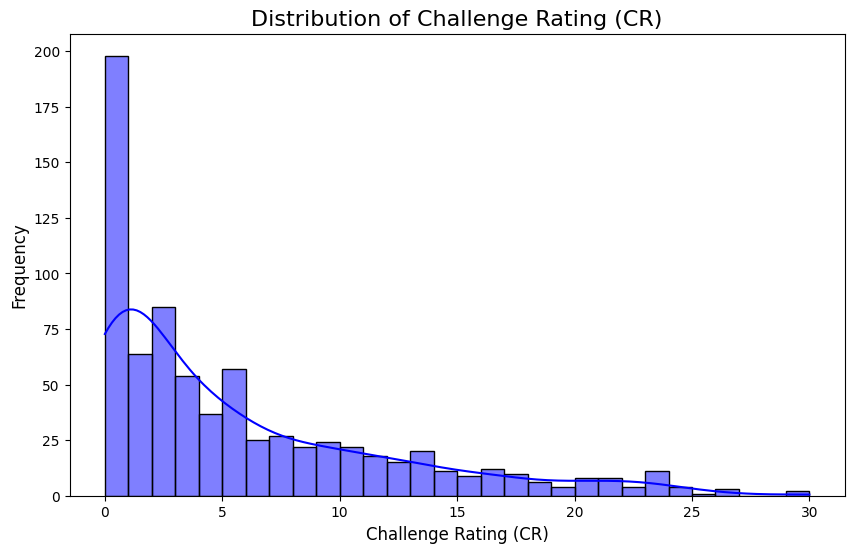

In [35]:
def convert_cr(value):
    try:
        if '/' in str(value):
            n, d = map(int, value.split('/'))
            return n / d
        else:
            return float(value)  
    except (ValueError, TypeError):  
        return float('nan')  

df = df.dropna(subset=['cr'])
df['cr'] = df['cr'].apply(convert_cr)

plt.figure(figsize=(10, 6))
sns.histplot(df['cr'], kde=True, color='blue', bins=30)
plt.title('Distribution of Challenge Rating (CR)', fontsize=16)
plt.xlabel('Challenge Rating (CR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

As we take a closer look at the CR distribution, we get an understanding of how the CR values are distributed across the dataset, and from this, we can infer several important things.

When we look at the CR values, we notice that a large portion of the data (particularly between 0 and 5) represents lower-level monsters. In fact, CR 0 to 1 accounts for around 200 entries, which is a large portion of the dataset, around 25%. This tells us that the dataset is skewed toward monsters that would typically appear in lower level adventures. This makes sense as these monsters are more common in the world of Dungeons & Dragons, as they are the types that adventurers encounter most frequently in the early stages of their journeys.

The distribution of CR values slowly decreases as the CR increases, indicating that as monsters get tougher and more powerful, particularly in the 20 to 30 range, they become less frequent. This gradual decrease implies that while the game contains a wide variety of creatures, the focus is overwhelmingly on those that are suitable for lower level campaigns.

There seems to be a complete absence of monsters with CR values around 27 - 29, which means the dataset is significantly lacking in high-level creatures. This poses a challenge, as it suggests that the model we develop will have limited exposure to high CR values, and thus may not generalize well when tasked with predicting these rare but important monsters.

The absence of these CR values raises a question about how to handle these missing or sparse data points. We need to decide whether to treat this as missing data, which could be imputed, or if we should simply remove these rows from the dataset. 
Given that the absence of higher CR values is a natural occurrence in D&D (due to their rarity), it may be acceptable to leave these gaps in the dataset.

###  Correlation Matrix
After inspecting the distribution of the CR values, we gained an understanding into how monster difficulties are spread within our dataset. 
However, understanding the relationship between CR and other attributes is equally important. To do this, we can look at correlations between CR and other numerical features such as hit points (HP), armor class (AC), and ability scores (like Strength, Constitution, and Charisma). By examining these correlations, we can start to identify which attributes might have the most influence on a monster’s difficulty, represented by its CR.

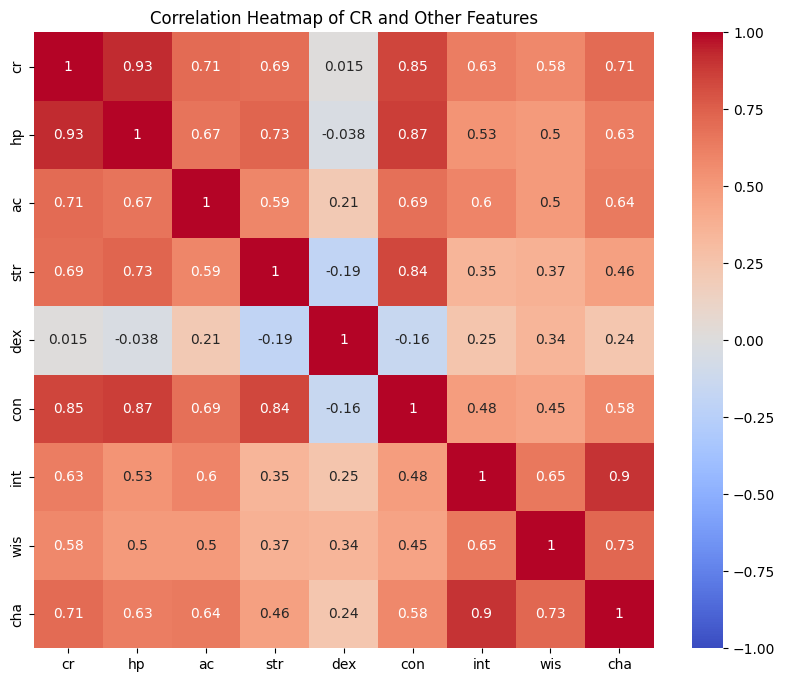

In [36]:
corr_matrix = df[['cr', 'hp', 'ac', 'str', 'dex', 'con', 'int', 'wis', 'cha']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of CR and Other Features')
plt.show()

From the correlation matrix, a few points become clear:

Hit Points (HP) and Constitution show the strongest correlation with CR, at 0.93 and 0.85, respectively. This high correlation means that a monster’s durability is a crucial factor in determining its CR value. Higher HP and Constitution scores directly contribute to a monster’s resilience, making it harder to defeat.

Charisma, Strength, and Armor Class (AC) also show a somewhat positive correlation with CR, with values around 0.7. This implies that certain combat related features, such as the monster’s physical power (Strength), defense (AC), and possibly even its influence or presence (Charisma), play a role in a monster’s challenge rating.

Dexterity, in contrast, has an almost negligible correlation with CR (0.015). This suggests that a monster’s agility does not significantly impact its difficulty level. This finding aligns with the notion that higher CR creatures rely more on durability and power than on agility alone.

With this understanding, we can consider which features may hold the most predictive value for CR and focus on them in further steps. Features with high correlation to CR could be emphasized in modeling, while those with low or no correlation, like Dexterity, might be deprioritized. 

### Comparing features in scatterplots

While correlation matrices provide a summary of linear relationships, they don’t always show the full picture. To better understand the nuances and patterns between CR and other attributes, we can take a more visual approach by plotting each feature against all others. This scatterplot grid will allow us to observe any trends or clusters that the correlation matrix alone might overlook, giving us a more complete view of the relationships within the data.

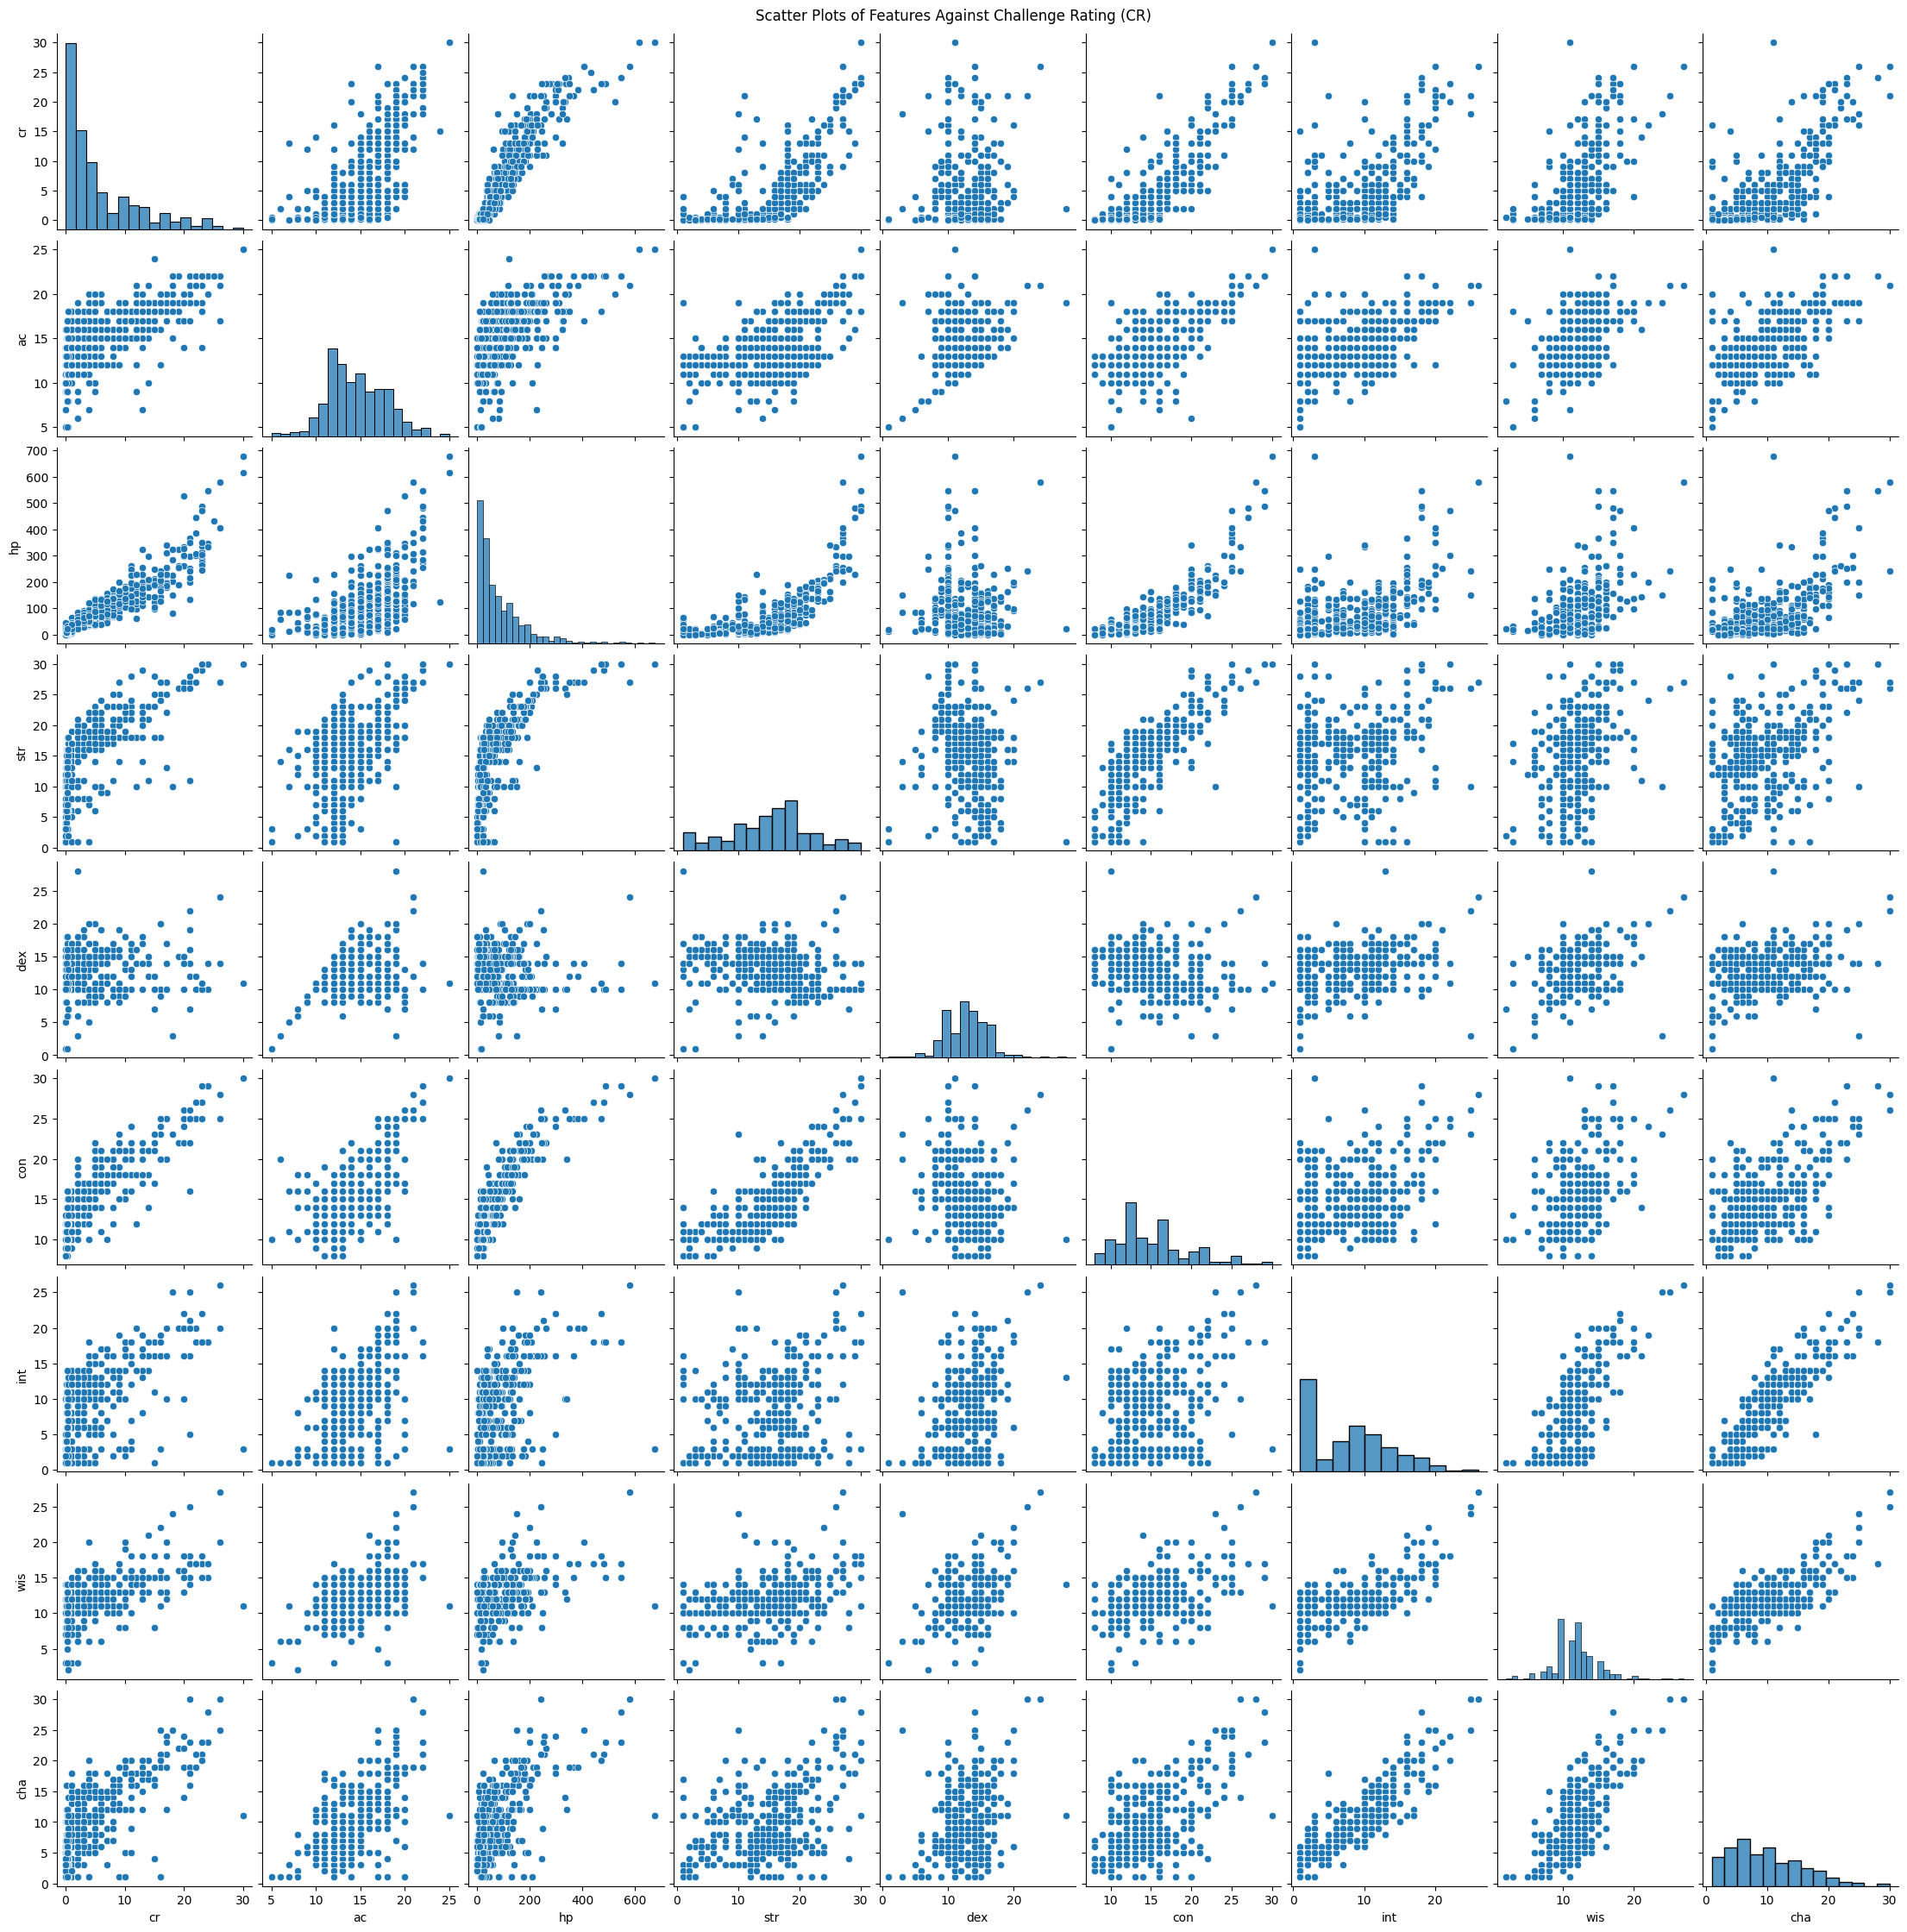

In [37]:
features = ['cr', 'hp', 'ac', 'str', 'dex', 'con', 'int', 'wis', 'cha']

sns.pairplot(data=df)
plt.suptitle('Scatter Plots of Features Against Challenge Rating (CR)', y=1)
plt.show()


From this grid of feature comparisons, a few relations between features can be seen:

- **Challenge Rating and HP**: The relationship between CR and HP stands out as one of the few with a somewhat clear linear trend, reinforcing the results from the correlation matrix that a monster’s durability and toughness play a significant role in determining its CR.

- **Strength and Constitution**: These two physical attributes also display a linear relationship with each other, which makes sense as both are key factors in a creature’s physical prowess and resilience. However, individually, they don’t appear as directly tied to CR as HP does. maybe it these features can be considered when doing feature engineering in the future.

- **Intelligence, Wisdom, and Charisma**: These mental attributes are closely connected to each other, often increasing together. This likely reflects the existence of spellcasting monsters, where higher values in these attributes indicate a more capable spellcaster. Despite this connection, they appear less impactful on CR, which aligns with the earlier correlation findings from the correlation matrix where HP, AC, and physical attributes had stronger links to CR.

These observations confirm that HP and a few other physical characteristics dominate in determining CR, with the mental attributes showing less influence in direct relation to CR, even though they do form a logical cluster together.

By focusing on these findings, we can move forward with a clearer picture of which features are most predictive of CR and which other features might add limited value in our model. Moving into data processing and feature selection, this understanding will guide us in prioritizing the features that carry the most weight in predicting challenge ratings.


### Spread of categorical features

Up until now, we have mostly looked at the correlation between features. It's also imporant imporant to check if the distribution of our categorical features span enough to be able to properly represent our data. Because the size feature has a hierarchical structure ranging from Tiny to Gargantuan, we believe that this feature might be a significant indicator of a monsters strength. Therefore, we would like to vizualize this feature.

To achieve this, we will start by creating a bar chart showing the frequency of each size category. This should offer insights into the overall makeup of the feature and providing context for further visualizations.

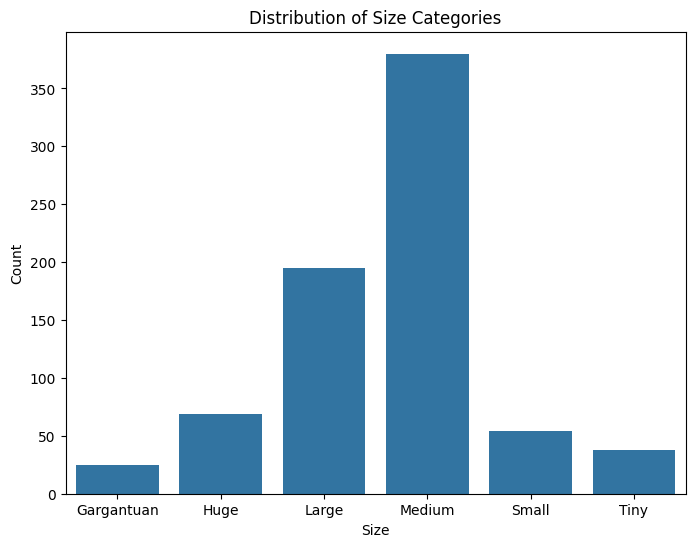

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='size', order=sorted(df['size'].unique()))
plt.title('Distribution of Size Categories')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

From the chart, it’s clear that monsters categorized as Medium dominate the dataset, greatly outnumbering the others. This aligns with our expectations, as 'Medium' is the size that most human and humanoid characters fall into. Large creatures are the second most frequent, followed by Huge,Small and Tiny monsters, which appear way less. The least represented categorie is Gargantuan, which makes sense, as these creatures are typically rare and often reserved for higher-level encounters or special scenarios.

This distribution gives us a good idea of the dataset’s distribution. However, it also raises some important questions: Does the dominance of Medium-sized monsters mean they are less challenging on average? Or do they span a wide range of CR values, making them versatile? And on the flip side, do the fewer but more imposing Gargantuan and Huge monsters consistently reflect higher difficulty levels?

We can use a boxplot to compare CR values across sizes

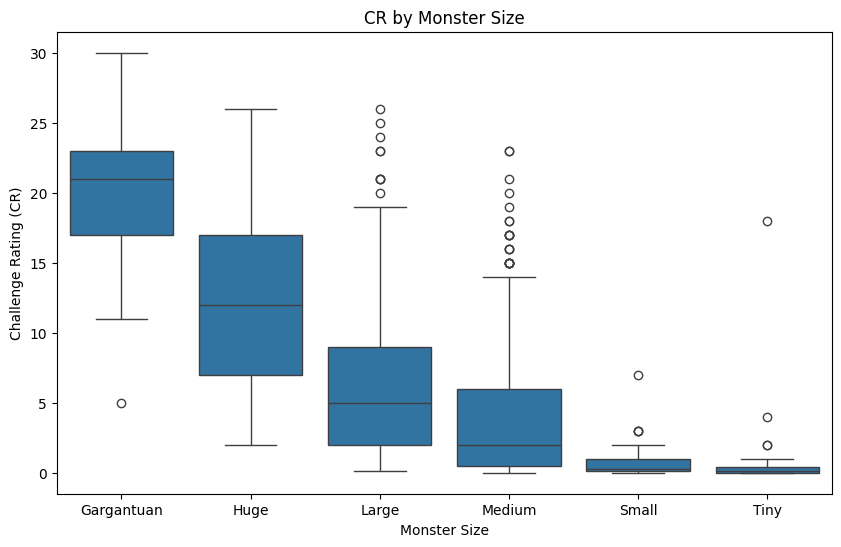

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='size', y='cr', order=sorted(df['size'].unique()))
plt.title('CR by Monster Size')
plt.xlabel('Monster Size')
plt.ylabel('Challenge Rating (CR)')
plt.show()

As expected, there is a general trend where larger monsters labeled Huge or Gargantuan tend to have higher CRs. Gargantuan creatures, in particular, has a tight group of CR values, with few outliers. This implies that monsters of this size are consistently among the most challenging. Huge monsters, on the other hand, displayed  a lot more variability, with their CRs spanning a way broader range. This means that while size often correlates with strength, Huge monsters offer a more diverse range of challenges.

For smaller creatures, the story was quite different. Tiny and Small monsters had the lowest range of CRs, as expected, but the outliers in these categories were particularly intriguing. Some Tiny monsters, despite their size, have remarkably high CRs.

This tells us that size is an important factor in determining CR, but not definitive. Larger creatures are generally more powerful, but the spread and outliers point at the importance of other features.

### Feature table

After analyzing the correlation matrix and the scatterplot grid, we have gained some valuable insights into the relationships between the different features and their potential impact on our target variable (CR).

Before moving forward with any data cleaning or preprocessing steps, we should to take a closer look at the quality of our dataset. This includes understanding the presence of missing values, the uniqueness of feature entries, and the overall data types. We already noticed some issues in the data previously that we will have to deal with.

The following table provides a summary of the missing values, unique entries, and data types for each feature in our dataset. Doing this will help us determine which features may require additional attention during the cleaning process.

In [40]:
def summarize_dataframe(dataframe):

    feature_summary = pd.DataFrame({
        'Feature Name': dataframe.columns,
        'Unique Entries': [dataframe[col].nunique() for col in dataframe.columns],
        'Missing Values': [dataframe[col].isnull().sum() for col in dataframe.columns],
        'Data Type': [dataframe[col].dtype for col in dataframe.columns]
    })

    feature_summary = feature_summary.set_index('Feature Name')
    return feature_summary

summarize_dataframe(df)

,Unique Entries,Missing Values,Data Type
Feature Name,,,
name,761,0,object
url,401,360,object
cr,31,0,float64
type,71,0,object
size,6,0,object
ac,20,0,int64
hp,159,0,int64
speed,3,514,object
align,17,0,object



From this table, we can make a few observations:

Legendary: This feature has the highest number of missing values (719 out of 762 entries). This suggests that very few creatures in the dataset have a "Legendary" status. We can also see that thsi feature contains only 1 unique value, while be defined it to have 2 unique values in our data dictionary. This is likely due to the fact that "Legendary" is a categorical indicator where missing values imply a non-legendary status. But the 'non-legendary' monsters in our data are not considered a type yet so we will have to encode this into a binary value with 0 being non-legendary and 1 being legendary.

Speed: Missing values are also relatively high here, with 514 entries missing. this suggests that very few creatures have a special 'speed' type like flying or swimming. As "Speed" is also a categorical indicator where missing values simply imply a lack of special movement, this feature will also be encoded as well.

Ability Scores (STR, DEX, CON, INT, WIS, CHA): Surprisingly, 361 entries are missing across all ability scores. Given the importance of these scores in determining a creature’s power level, durability, and abilities, we will need to carefully decide how to address these missing values.

URL: This feature, also with 361 missing values, provides external information. Since it doesn’t directly affect our model or analysis, we will probably exclude it altogether.

Type and Align: The ranges noted down for these 2 features in the data dictionary were 14 for Type and 9 for Align. Yet in this table we can see that the Type and Align features seem to have more unique entries than what should be possible. We won't bother ourselves with the 'Align' feature as it will be discarded, but we should definitely take note of what is happening in the 'Type' feature.

## Data Preparation

Now that we have a better understanding of the dataset and gathered insights about the relationships between features, as well as identified areas with missing or inconsistent data, we are ready to move into the data preparation phase. Here, we will address the issues that we uncovered, such as missing values, irrelevant features, and potential inconsistencies.

To begin, we will drop the features that we don't plan to use. 
As the features 'Name', 'Align', 'Source' and 'Url' don't help towards predicting teh CRr, they will be removed.

In [41]:
df = df.drop(columns=['url', 'source', 'align'])

<!-- Now, we will address the missing CR value. As we saw earlier, there is one row with a missing Challenge Rating (CR) value. Since this column is crucial for our analysis and modeling, these missing cr values will be considered problems and promptly removed. -->

## Mismatch of unique counts

In our last step of the 'Data Understanding' step that we just went through, we noticed that the amount of unique values in the Type feature seem to be larger than the range we defined in the data dictionary. This naturally shouldn't be possible. Let's take a look at the entries for this feature. 

In [42]:
df['type'].value_counts().sort_index()

type
aberration                    34
aberration (shapechanger)      3
beast                        106
celestial                      7
celestial (titan)              1
                            ... 
plant                         24
swarm of Tiny beasts           8
undead                        47
undead (shapechanger)          2
undead (titan)                 1
Name: count, Length: 71, dtype: int64

It now becomes clear that the issue is that the 'subtypes' (represented by the value between the parentheses) are considered different unique types. To fix this, We can simply compact the subtypes into their parent type.

Another point to notice is the 'swarm of Tiny beasts' entry. 'Swarm' is not considered an official creature type according to the core ruleset and is thus also not present in our data dictionary. However, due to the different mechanics that come with 'swarms' in D&D, i believe it to be more valuable to keep the entries as 'swarms' rather than joining them into 'beasts'. This decision will therefore increase the number of uniqe entries for the 'Type' feature from 14 to 15.

In [43]:
df['type'] = df['type'].str.split(' ').str[0]
df['type'].value_counts().sort_index()

type
aberration      37
beast          106
celestial        8
construct       24
dragon          47
elemental       38
fey             21
fiend           89
giant           27
humanoid       189
monstrosity     85
ooze             8
plant           24
swarm            8
undead          50
Name: count, dtype: int64

### Encoding features

Next, we’ll address encoding for the legendary and size features. Since legendary currently indicates whether a creature has legendary status with text values, we’ll convert it into a binary value. This will allow the model to treat legendary creatures distinctly by using 1 for legendary and 0 for non-legendary entries.

Similarly, the size feature is categorical, describing the creature’s size with labels like “Tiny,” “Small,” or “Huge.” 
We’ll map each category to a numerical value on a scale from 1 (Tiny) to 6 (Gargantuan). 

In [44]:
df['legendary'] = df['legendary'].apply(lambda x: 1 if x == 'Legendary' else 0)

size_mapping = {
    'Tiny': 1,
    'Small': 2,
    'Medium': 3,
    'Large': 4,
    'Huge': 5,
    'Gargantuan': 6
}

df['size'] = df['size'].map(size_mapping)

df['size'].value_counts().sort_index()


size
1     38
2     54
3    380
4    195
5     69
6     25
Name: count, dtype: int64

#### Speed
This features contains information about whether a creature could fly, swim, both, or neither. As this feature can contain multiple abilities in a single value, it makes it slightly more difficult to directly incorporate into our model. To battle this, we encode the feature in a way that captured the individual abilities of each creature seperately. By splitting this feature into two new columns, namely can_fly and can_swim, we can now represent each ability independently

In [45]:

df['can_fly'] = df['speed'].apply(lambda x: 1 if 'fly' in str(x).lower() else 0)
df['can_swim'] = df['speed'].apply(lambda x: 1 if 'swim' in str(x).lower() else 0)

df = df.drop(columns=['speed'])

df.head()

,name,cr,type,size,ac,hp,legendary,str,dex,con,int,wis,cha,can_fly,can_swim
0,aarakocra,0.25,humanoid,3,12,13,0,10.0,14.0,10.0,11.0,12.0,11.0,1,0
1,abjurer,9.00,humanoid,3,12,84,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,aboleth,10.00,aberration,4,17,135,1,21.0,9.0,15.0,18.0,15.0,18.0,0,1
3,abominable-yeti,9.00,monstrosity,5,15,137,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,acererak,23.00,undead,3,21,285,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0



### Filling missing ability scores

All that's left now is dealing with the missing ability scores. To handle the missing values in the ability scores, we’ll try to supplement our dataset with additional information from an external source. We’ve found another CSV file containing ability scores, which may help fill in some of the missing data in our current dataset.

By merging the additional CSV with our existing data, we aim to match and update the missing values in the str, dex, con, int, wis, and cha columns. If successful, this approach will enhance our dataset by increasing the completeness of these key features, which could positively impact the reliability of our analysis and the accuracy of any models we build in the future.

In [46]:
file_path = 'ability_scores.csv'
df_as = pd.read_csv(file_path)
df_as.head()

,Name,Type,ALIGNMENT,Size,CR,AC,HP,STR,DEX,CON,INT,WIS,CHA
0,Vulture,Beast,U,Medium,0,10,5,7,10,13,2,12,4.0
1,Badger,Beast,U,Tiny,0,10,3,4,11,12,2,12,5.0
2,Giant Fire Beetle,Beast,U,small,0,13,4,8,10,12,1,7,3.0
3,Hyena,Beast,U,Medium,0,11,5,11,13,12,2,12,5.0
4,Baboon,Beast,U,Small,0,12,3,8,14,11,4,12,6.0


In [47]:

df_as.columns = df_as.columns.str.lower()

df_as['name'] = df_as['name'].str.lower()
df_as['name'] = df_as['name'].str.replace('-', ' ')
df['name'] = df['name'].str.replace('-', ' ')

df = df.drop(columns=['str', 'dex', 'con', 'int', 'wis', 'cha'])

df = pd.merge(df, df_as[['name', 'str', 'dex', 'con', 'int', 'wis', 'cha']], on='name', how='left')

missing_ability_scores = df[['str', 'dex', 'con', 'int', 'wis', 'cha']].isnull().sum()

summarize_dataframe(df)


,Unique Entries,Missing Values,Data Type
Feature Name,,,
name,761,0,object
cr,31,0,float64
type,15,0,object
size,6,0,int64
ac,20,0,int64
hp,159,0,int64
legendary,2,0,int64
can_fly,2,0,int64
can_swim,2,0,int64


With this method, we were able to reduce the missing rows from 360 down to 135. This is already a major improvement.
From here, we will have to consider how to approach the remaining 136 missing rows.
I’ve decided to proceed by dropping the remaining missing values both in an attempt to simplify the prepocessing step. But alternatives like extra suplementary data or using a form of imputation like mean/median or knn-imputation will be considered in future iterations.


We decided give knn-imputer a try , as it looks at the nearest entries to it to fill in the missing data.
We found that the resulting values after the imputation were within expected ranges. While the imputation improved the accuracy of our Linear Regression model, it slightly decreased the performance of the Random Forest Regressor. This was the case with most of the imputation methods that were attempted.

Despite this, the imputation made it possible to preserve the  rows that would otherwise have been dropped, and considering that the missing rows equaled about 18% of our total data, we felt that the trade-off was worthwhile. The improvement in Linear Regression performance indicated that the imputed rows were beneficial in certain contexts.


In [48]:

from sklearn.impute import KNNImputer

columns_to_impute = ['str', 'dex', 'con', 'int', 'wis', 'cha']
knn_imputer = KNNImputer(n_neighbors=5)  
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

print(summarize_dataframe(df))





              Unique Entries  Missing Values Data Type
Feature Name                                          
name                     761               0    object
cr                        31               0   float64
type                      15               0    object
size                       6               0     int64
ac                        20               0     int64
hp                       159               0     int64
legendary                  2               0     int64
can_fly                    2               0     int64
can_swim                   2               0     int64
str                       31               0   float64
dex                       25               0   float64
con                       23               0   float64
int                       27               0   float64
wis                       26               0   float64
cha                       30               0   float64


### Preparation and Training

With the data now cleaned and ready, it is time to set up the machine learning parts. As mentioned before, my goal is to predict the CR value of creatures based on their attributes. To achieve this, We first define the target variable, which in our case is CR, and select features that are likely to influence it. 
These include attributes like size, AC, HP, and legendary status, as well as the six ability scores: strength, dexterity, constitution, intelligence, wisdom, and charisma.


Next, we split the dataset into training and testing sets, reserving 20% of the data for evaluation. We set a random state ensured so that the results would be reproducible.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

target = 'cr'
features = ['size', 'ac', 'hp', 'legendary', 'str', 'dex', 'con', 'int', 'wis', 'cha']

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

For the model itself, we chose linear regression as the starting point. I find linear regression to be a good choice for this initial phase as it’s straightforward and interpretable. This hopefully allows me to focus on understanding the relationships between the features and the target variable. Additionally, it serves as a strong foundational model. If linear regression turn out to performs well, it suggests that there are meaningful linear relationships in the data. If not, it acts as a stepping stone towards exploring more advanced models later.

In [50]:
model_cln = LinearRegression()
model_cln.fit(X_train, y_train)

LinearRegression()

### Prediction and evaluation

After training the model on the training data, we need to test to see how it actually holds up. To evaluate its performance, we can calculate the Root Mean Squared Error (RMSE) and the R2 score. RMSE helps gauge how far off the predictions are from the actual CR values on average. 
R2 on the other hand, measures how much of the variance in the target variable is explained by the model. Together, these metrics should hopefully provide a good picture of how well the model is performing.

In [51]:
y_pred = model_cln.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [52]:
print(f"MSE: {mse:.2f}, R2: {r2:.2f}")

MSE: 2.04, R2: 0.89


The results of the linear regression model seem like a good start. With an MSE of 2.04, the model's predictions deviate from the actual CR by approximately 2.04 units on average. Given that CR values range from 0 to 30, this level of error is relatively low.

The R2 score of 0.89 further reinforces this impression. An R2 value of 0.89 should means that the model explains 89% of the variance in the CR values. In other words, the chosen features are strongly predictive of a creature's CR.

However, there’s still room for improvement. An MSE of 2.04 might not be as significant for higher CR creatures, but for low CR creatures, even a small deviation could represent a substantial difference in power or challenge. Additionally, an R2 of 0.89, while excellent, leaves 13% of the variance unexplained, which could be a result of non-linear interactions, omitted features, or other noise in the data.

### Random Forest

With the linear regression model providing a solid foundation, we need to consider how we might improve upon its performance. While linear regression effectively captures the relationships between our features and the target variable (CR), its limited in a sense where it assumes linearity. D&D monsters are not that simple. And as presented earlier in the scatterplots, we have concluded that a lot of features don't follow a linear pattern.

So we need to find a model that is capable of finding any possible underlying non-linear relationships that might be present between our features.

For thsis, we chose random forest due to its capacity to better capture the non-linear relationships in our dataset that linear regression might fail to capture. 
Unlike linear regression, which relies on the assumption of a direct, linear relationship between features and the CR feature, Random Forest should effectively captures these interactions and patterns among features. Additionally, Random Forest is able to provide us with insights into feature importance, allowing us to see which attributes significantly influence CR and which attributes are negligable. Given the variability observed in important features like HP, using Random Forest should enable us to improve our predictions.

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score


X = df[['hp', 'ac', 'size', 'can_fly', 'can_swim', 'legendary', 'str', 'dex', 'con', 'int', 'wis', 'cha' ]]
y = df['cr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf_model = RandomForestRegressor(n_estimators=200, random_state=1, min_samples_split=5, min_samples_leaf=2)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

importances = rf_model.feature_importances_
feature_names = X.columns
print("Feature importances:", dict(zip(feature_names, importances)))


Mean Squared Error: 1.6557708223729626
R² Score: 0.9216123785204484
Feature importances: {'hp': np.float64(0.9204239877972584), 'ac': np.float64(0.014902939557047284), 'size': np.float64(0.0023512925414914828), 'can_fly': np.float64(0.0010308385817603192), 'can_swim': np.float64(0.0008258866049641602), 'legendary': np.float64(0.003724171206736889), 'str': np.float64(0.005495078716669733), 'dex': np.float64(0.005907593333322861), 'con': np.float64(0.004553788918948353), 'int': np.float64(0.020035816405233345), 'wis': np.float64(0.010192389504077698), 'cha': np.float64(0.010556216832489557)}


The results from the Random Forest model show a significant improvement comapred to the linear regression model. 
The MSE dropped to 1.65, a significant reduction compared to the previous 2.12. 
Similarly, the R2 score increased to 0.92 from the earlier 0.87, even better explaining the variance. 

As expected, HP overwhelmingly dominates the model's predictions, contributing nearly 88%. This aligns with expectations, as HP is often a direct indicator of a creature's durability and, consequently, its CR. 
However, the degree to which HP overshadows other features is more than i expected.

Other features, such as AC, INT, and WIS show minor contributions, while attributes like size, STR, and legendary status barely influence the model's predictions. This raises some questions about the dataset and the mechanics of D&D itself.

The results suggest that while Random Forest is good for improving prediction accuracy, the model is still heavily driven by a single dominant feature. 
It is good to consider whether further feature engineering or balancing might result in better results.

### Residuals

We know that there is a certain deviation when predicting the CR value, 1.65 specifically when we look at the results from the random forest model.
Now, we want to know if there are certain patterns where these deviations occur. Is the deviation random or can we find swings at certain CR levels. 
To visualise this, we can take a look at the residuals. Residuals basically describe the difference between the expected and actual values. we plot these residuals against the CR to see if the model struggles with certain predictions and by how much.

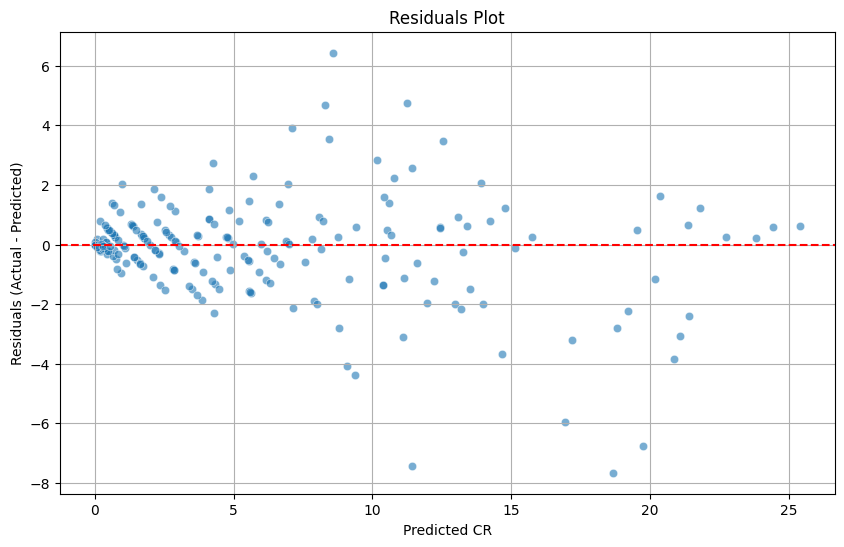

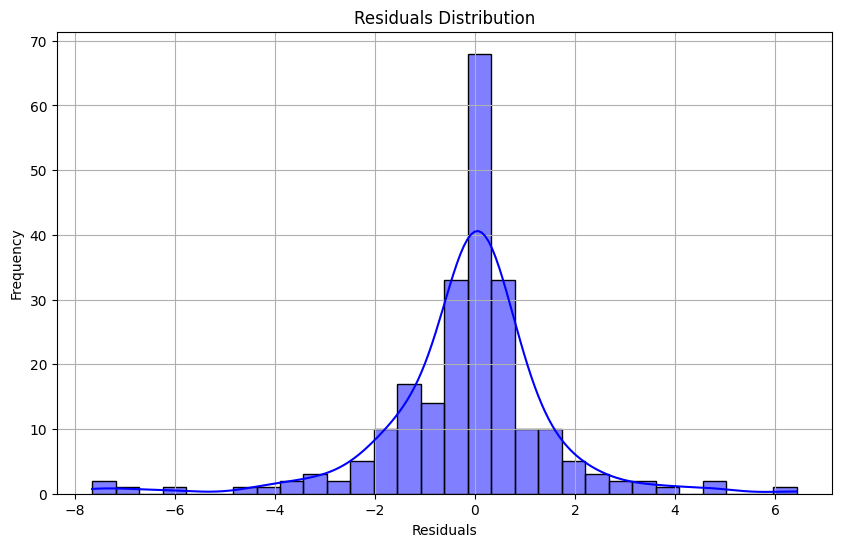

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred = rf_model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted CR")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



We can see that the model does fairly well most of the time, specifically in the lower CR range. But it really starts to struggle when attempting to predict higher CR monsters.
This is expected as we noticed before that we have a small sample set for CR monsters of that caliber. 


## New Dataset

In order to improve the performance and generalization of the model, We decided to add additional data that could provide more predictive power. The new dataset, similar to the first dataset used, contains various attributes related to Dungeons & Dragons (DnD) monsters. The real value in the addition of this dataset is twofold. This dataset adds another ~3000 monsters, boosting it to a total of around 3700. This dataset also contains 49 features compared to the 17 we had before, opening up options to add in more features in the future. Let's take a look at what we are working with

In [156]:
import pandas as pd

new_df = pd.read_csv("monsters_data.csv")
print("Number of rows and columns:", new_df.shape)
new_df.sample(5)


Number of rows and columns: (3057, 49)


,slug,desc,name,size,type,subtype,group,alignment,armor_class,armor_desc,...,legendary_actions,special_abilities,spell_list,page_no,environments,img_main,document__slug,document__title,document__license_url,document__url
1391,guardian_naga_bf,NaN,Guardian Naga,large,Monstrosity,NaN,Nagas,NaN,18,natural armor,...,[],"[{'name': 'Divine Strikes', 'desc': ""The naga'...",[],NaN,[],NaN,blackflag,Black Flag SRD,https://paizo.com/orclicense,https://koboldpress.com/black-flag-reference-d...
2398,shadow,NaN,Shadow,Medium,Undead,NaN,NaN,chaotic evil,12,NaN,...,NaN,"[{'name': 'Amorphous', 'desc': 'The shadow can...",[],344.0,"['Underdark', 'Urban', 'Shadowfell', 'Caverns'...",NaN,wotc-srd,5e Core Rules,http://open5e.com/legal,http://dnd.wizards.com/articles/features/syste...
774,devil-shark,NaN,Devil Shark,Gargantuan,Monstrosity,NaN,NaN,neutral evil,16,natural armor,...,NaN,"[{'desc': ""The devil shark has advantage on me...",[],98.0,[],NaN,cc,Creature Codex,http://open5e.com/legal,https://koboldpress.com/kpstore/product/creatu...
449,bugbear_bf,NaN,Bugbear,medium,Humanoid,NaN,Goblins,NaN,14,hide armor,...,[],"[{'name': 'Brutal', 'desc': 'A melee weapon de...",[],NaN,[],NaN,blackflag,Black Flag SRD,https://paizo.com/orclicense,https://koboldpress.com/black-flag-reference-d...
247,arcane-scavenger,NaN,Arcane Scavenger,Large,Construct,NaN,NaN,neutral,17,natural armor,...,NaN,"[{'name': 'Construct Nature', 'desc': ""Doesn't...",[],41.0,[],NaN,tob3,Tome of Beasts 3,http://open5e.com/legal,https://koboldpress.com/kpstore/product/tome-o...


In [157]:
new_df.describe()

,armor_class,hit_points,strength,dexterity,constitution,intelligence,wisdom,charisma,strength_save,dexterity_save,constitution_save,intelligence_save,wisdom_save,charisma_save,perception,cr,page_no
count,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,564.000000,990.000000,1072.000000,532.000000,1159.000000,946.000000,1837.000000,3057.000000,2713.000000
mean,14.666994,101.894014,15.423945,13.850507,16.016683,9.038273,12.829571,11.081780,4.833333,4.755556,6.476679,1.951128,4.838654,4.852008,7.820359,5.595518,246.270918
std,2.677532,94.283499,6.115826,3.886170,4.431125,5.544103,3.797225,6.116976,4.385171,2.935581,4.120434,4.964038,3.386301,4.665451,5.923657,5.382008,128.071784
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-5.000000,-5.000000,-1.000000,-5.000000,-4.000000,-5.000000,-4.000000,0.000000,0.000000
25%,13.000000,39.000000,12.000000,11.000000,13.000000,4.000000,10.000000,6.000000,2.000000,2.000000,3.000000,-2.000000,2.000000,1.000000,3.000000,1.000000,137.000000
50%,15.000000,82.000000,16.000000,14.000000,16.000000,10.000000,12.000000,10.000000,4.000000,5.000000,6.000000,1.000000,5.000000,5.000000,6.000000,4.000000,264.000000
75%,16.000000,136.000000,19.000000,16.000000,18.000000,12.000000,15.000000,16.000000,8.000000,7.000000,9.000000,6.000000,7.000000,8.000000,12.000000,8.000000,351.000000
max,25.000000,1230.000000,44.000000,30.000000,42.000000,38.000000,38.000000,44.000000,19.000000,15.000000,19.000000,15.000000,19.000000,17.000000,30.000000,30.000000,499.000000


We can see some familiar features, which is good because those are the ones that we are after. The ranges seem similar and within expectation.
Before integrating the new dataset into the current analysis, several cleaning and preprocessing steps are still necessary.
We will first rename the features that we intend to use so that they match the feature names of our current dataset. We do this to easily merge this dataset into the existing dataset.

In [158]:
rename_mapping = {
    "name": "name_capitalized",
    "slug": "name",
    "armor_class": "ac",
    "hit_points": "hp",
    "strength": "str",
    "dexterity": "dex",
    "constitution": "con",
    "intelligence": "int",
    "wisdom": "wis",
    "charisma": "cha",
}
new_df.rename(columns=rename_mapping, inplace=True)

columns_to_keep = ["name","cr", "ac", "hp","size", "type", "speed", "str", "dex", "con", 
                   "int", "wis", "cha"]
new_df = new_df[columns_to_keep]
new_df.sample(5)


,name,cr,ac,hp,size,type,speed,str,dex,con,int,wis,cha
2473,sooze,0.500,12,49,Medium,Aberration,"{'climb': 10, 'walk': 30}",14,10,10,10,14,16
937,efreeti-noble-a5e,11.000,17,344,Large,Elemental,"{'walk': 40, 'fly': 60}",22,18,22,14,16,16
2401,shrieker,0.000,5,13,Medium,Plant,{'walk': 0},1,1,10,1,3,1
2486,speaker-to-the-darkness,5.000,16,135,Small,Humanoid,{'walk': 25},11,16,18,10,9,18
1222,giant-moth,0.125,11,7,Small,Beast,"{'fly': 30, 'walk': 25}",10,12,10,3,10,7


In [159]:
df.sample(5)

,name,cr,type,size,ac,hp,legendary,can_fly,can_swim,str,dex,con,int,wis,cha
149,cyclops,6.0,giant,5,14,138,0,0,0,22.000000,11.000000,20.000000,8.000000,6.000000,10.00
639,tabaxi hunter,1.0,humanoid,3,14,40,0,0,0,14.610224,13.370607,15.051118,9.001597,12.059105,10.24
231,expert lvl 3,0.0,humanoid,3,14,22,0,0,0,14.610224,13.370607,15.051118,9.001597,12.059105,10.24
84,berserker,2.0,humanoid,3,13,67,0,0,0,16.000000,12.000000,17.000000,9.000000,11.000000,9.00
10,adult bronze dragon,15.0,dragon,5,19,212,1,1,1,14.610224,13.370607,15.051118,9.001597,12.059105,10.24


Now that the features match, we look at fixing the individual features.

In [160]:
import ast
import pandas as pd


size_mapping = {
    "Tiny": 1,
    "Small": 2,
    "Medium": 3,
    "Large": 4,
    "Huge": 5,
    "Gargantuan": 6
}

new_df['size'] = new_df['size'].str.capitalize().map(size_mapping)

def extract_speed_features(speed_str):
    try:
        speed_dict = ast.literal_eval(speed_str)
    except (ValueError, SyntaxError):
        speed_dict = {}

    return pd.Series([int('swim' in speed_dict), int('fly' in speed_dict)])

new_df[['can_swim', 'can_fly']] = new_df['speed'].apply(extract_speed_features)

new_df.drop(columns=['speed'], inplace=True)

combined_df = pd.concat([new_df, df], ignore_index=True).dropna(subset=['size'])

summarize_dataframe(combined_df)


,Unique Entries,Missing Values,Data Type
Feature Name,,,
name,3653,0,object
cr,32,0,float64
ac,20,0,int64
hp,285,0,int64
size,6,0,float64
type,30,0,object
str,34,0,float64
dex,29,0,float64
con,33,0,float64


We have gone through a few steps to comform the new data to follow the structure of the old dataset

For example, the 'size' column, which contained inconsistent capitalization ( "Large" vs "large"), was modified by capitalizing the first letter of each entry.

The 'speed' column contained string representations of dictionaries (e.g., {'walk': 40, 'fly': 80}). We have prviously created binary features, such as can_swim and can_fly, based on whether the monster could swim or fly.  We once again extract the strings and fill in the can_swim and can_fly columns where it meets the criteria.

Rows with missing or empty values, particularly in the 'size' column, were removed to avoid adding noise into the model and ensure better performance.

Lastly, The 'size' feature was mapped to numerical values based on predefined categories much like we did with the previous data (Tiny = 1, Gargantuan = 6)

After these preprocessing steps, the dataset was once again ready for modeling, and we combined it with the original dataset to create an even more comprehensive dataset.

### Prediction and evaluation

With the cleaned dataset in place, I tested some more different machine learning models to determine the best one for predicting the CR of the monsters. Besides the familiar Linear Regression and Random forest previously implemented, I decided to try out two other popular tree-based ensemble models. Namely Gradient Boosting Regressor (GBR) and XGBoost (XGB).

GBR builds decision trees sequentially, where each new tree attempts to correct the errors made by the previous ones. This model is more effective for datasets with features that have non-linear relationships, such as those found in the attributes of DnD monsters.

XGBoost is an optimized version of GBR, which incorporates advanced features like regularization, parallelization, and handling of missing data, making it faster and more accurate.


#### Linear Regression

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

X = combined_df[['hp', 'ac', 'size', 'can_swim', 'can_fly', 'str', 'dex', 'con', 'int', 'wis', 'cha' ]]
y = combined_df['cr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model_cln = LinearRegression()
model_cln.fit(X_train, y_train)

y_pred = model_cln.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}, R2: {r2:.2f}")

MSE: 1.84, R2: 0.88


#### Random Forest

In [166]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, random_state=1)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

importances = rf_model.feature_importances_
feature_names = X.columns
print("Feature importances:", dict(zip(feature_names, importances)))

Mean Squared Error: 1.2985459116578002
R² Score: 0.9422173868311287
Feature importances: {'hp': np.float64(0.9102627617959027), 'ac': np.float64(0.02507746567735979), 'size': np.float64(0.003764270283288041), 'can_swim': np.float64(0.0008613398354470926), 'can_fly': np.float64(0.0017338072522148414), 'str': np.float64(0.00837985558650125), 'dex': np.float64(0.00784189059744758), 'con': np.float64(0.008172864354676975), 'int': np.float64(0.015810693494624446), 'wis': np.float64(0.007734375212014489), 'cha': np.float64(0.010360675910522851)}


#### Gradient Boosting

In [181]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=300, random_state=1)
gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MSE: 1.2894298518958576
R² Score: 0.9430258308056534


In [177]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MSE: 1.2453842242269486
R² Score: 0.9468517119450918


##### Results
- Random Forest (RF): Achieved an MSE of 1.29 and an R² of 0.94 after preprocessing the dataset.
- Gradient Boosting Regressor: Produced an MSE of 1.30 and an R² of 0.94, very close to Random Forest.
- XGBoost: Outperformed both RF and GBR with the lowest MSE of 1.24 and similar R² of 0.94.

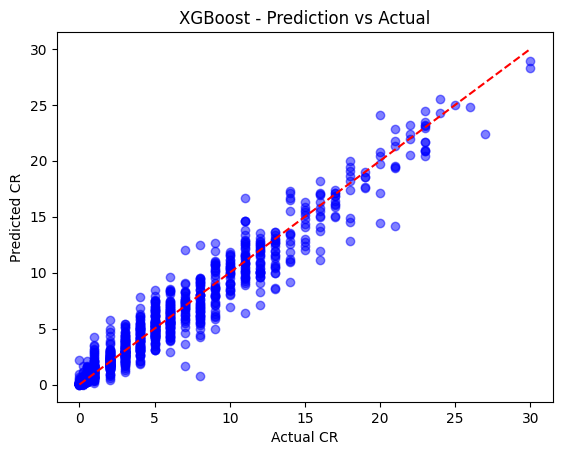

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("XGBoost - Prediction vs Actual")
plt.xlabel("Actual CR")
plt.ylabel("Predicted CR")
plt.show()


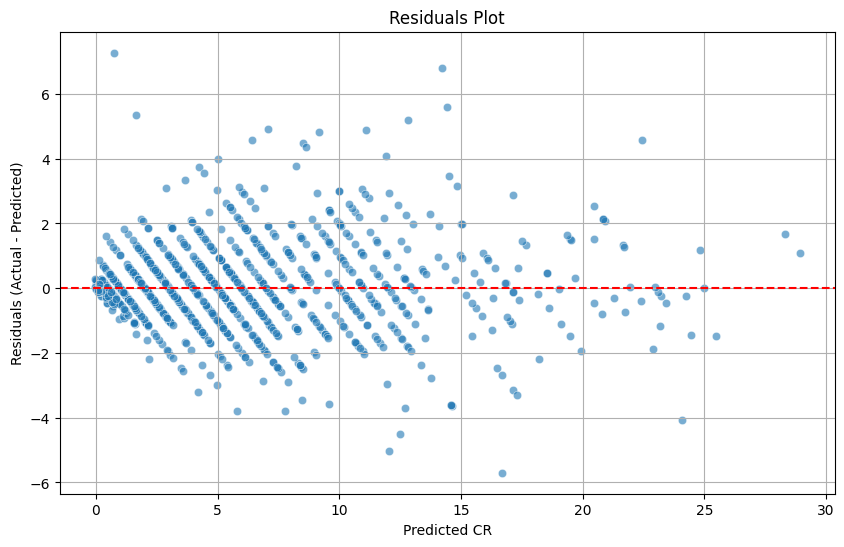

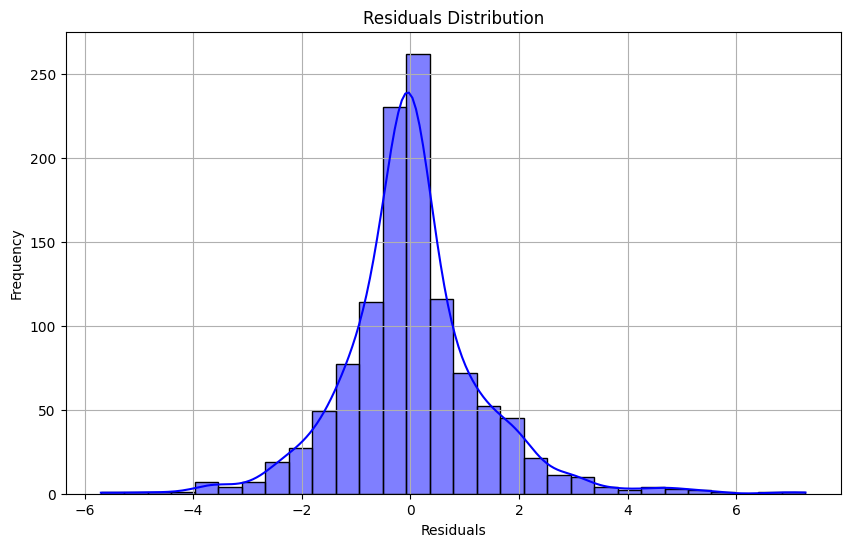

In [188]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted CR")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## Conclusion

In this analysis, I worked with three different sequential models, namely the Random Forest, Gradient Boosting Regressor and XGBoost to predict the CR of any D&D creature on the basis of its size, hit points, armor class and scores of abilities.

The findings showed that two of the models, namely Random Forest and GBR, achieved quite respectable MSE numbers of 1.29 although XGBoost was the better one with the lowest MSE of 1.24. This is another major improvement compared to the 1.56 we achieved before the integration of the new dataset.

The fact that this modelling predicted the CR with R-squared values all above 0.9, implies that these models performed well since a sizable share of the variance about the dependent variable was accounted for by the models. The feature importance tool showed that size, hit points, and armor class are among those attributes of the CR which were expected to be the most affected and which were quite realistic (in terms of DnD game mechanics). Though it still seems to be dominated heavily by the hit points.
